#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [175]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [176]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [177]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

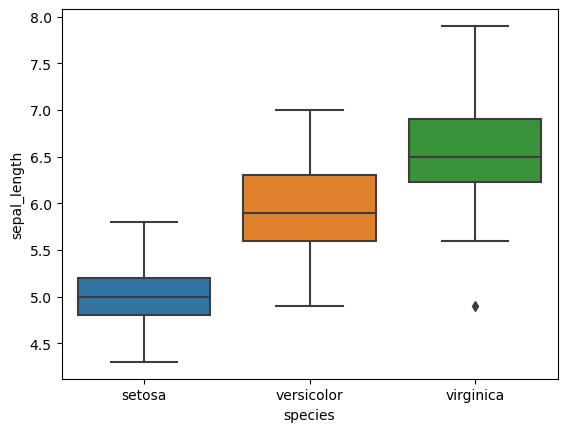

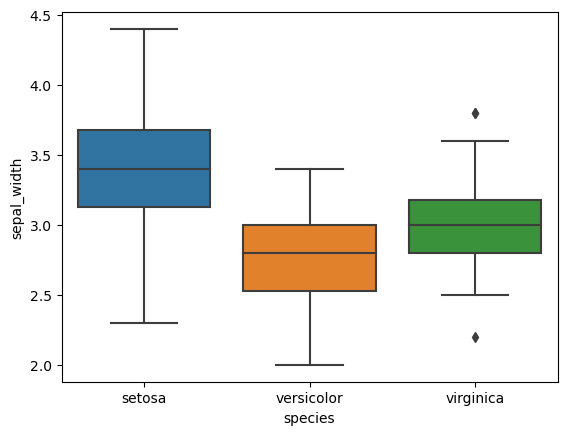

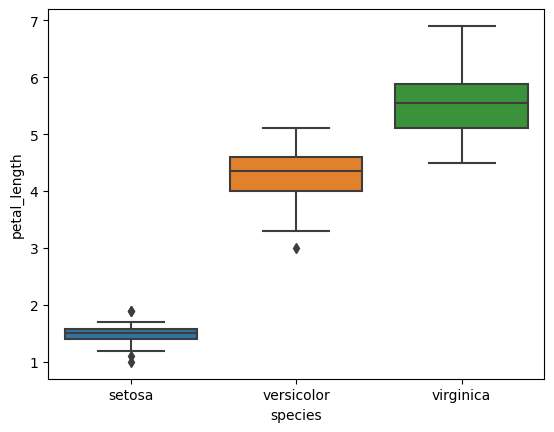

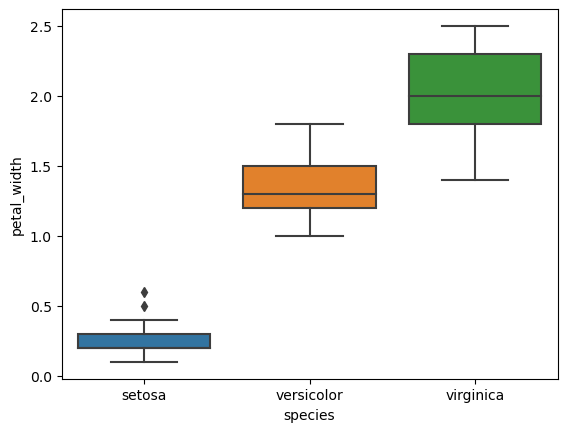

In [178]:
for x in df.columns[:4]:
    # Create a boxplot for each column
    sns.boxplot(x=df['species'], y=df[x])
    plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [179]:
#split dataset to dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [180]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [181]:
#do scaling to x_train and x_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [182]:
#build model and test the accuracy using logistic regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

Uji model dengan dataset test

In [183]:
#testt model with test dataset
y_pred = log_model.predict(x_test)
print(y_pred)

['setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa']


In [184]:
#check accuracy and confusion matrix from logistic regression
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion matrix:
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [185]:
#build model based on data training made at the preprocessing step using naive bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [186]:
#test model with test dataset
y_pred = nb_model.predict(x_test)
print(y_pred)

['setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [187]:
#check accuracy from naive bayes classifier
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion matrix:
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy: 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [188]:
#build model based on data training made at the preprocessing step using k-nearest neighbors with euclidean distance
knn_model = KNeighborsClassifier(metric='euclidean')
print(knn_model)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [189]:
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(y_pred)

['setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [190]:
#check accuracy from k-nearest neighbors classifier
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion matrix:
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy: 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Logistic
```
Confusion matrix:
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy: 1.0
```

Naive bayes
```
Confusion matrix:
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy: 1.0
```

K-Nearest Neaighbors
```
Confusion matrix:
 [[7 0 0]
 [0 4 0]
 [0 0 4]]
Accuracy: 1.0
```

dalam tes akurasi tersebut ketiganya mendapatkan akurasi yang sama yaitu 100%, tidak ada model yang menghasilkan akurasi yang lebih baik dari model lainnya.